In [2]:
import torch.nn as nn
import torch.optim as optim
import torch
import numpy as np
import matplotlib.pyplot as plt
import os


In [3]:
from torchvision import transforms

In [4]:
from torchvision import datasets

In [5]:
import torch.utils.data

In [6]:
def array_Tensor(arr):
    tensor_transfrom = transforms.ToTensor()
    t1 = tensor_transfrom(arr)
    return t1 


In [7]:
def get_weights(arr):
    t = arr
    tag_percentage = [] 
    pixels = [] 
    for i in range(13): 
        im = np.zeros((128,128))
        im[np.where(t==i)[0], np.where(t==i)[1]]=1
        total = im.sum()
        total_percentage = (total/16384)*100
        tag_percentage.append(total_percentage)
        pixels.append(total)
    
    norm =[]
    for x in pixels:
        normalized = (x-min(pixels))/(max(pixels)-min(pixels))
        norm.append(normalized)
    
    inv_norm = []
    for n in norm:
        inv = 1- n
        inv_norm.append(inv)

    inv_norm = inv_norm/sum(inv_norm)

    return inv_norm
   


In [8]:
def get_weights2(data):
    inv_norms=[]
    for i in range(3000):
        t = np.load("/home/dh26/Documents/Carla/gym-carla/Unet_images/Sunny/Semantic_array/"+dataset[i])
        tag_percentage = [] 
        pixels = [] 
        for i in range(13): 
            im = np.zeros((128,128))
            im[np.where(t==i)[0], np.where(t==i)[1]]=1
            total = im.sum()
            total_percentage = (total/16384)*100
            tag_percentage.append(total_percentage)
            pixels.append(total)
        
        norm =[]
        for x in pixels:
            normalized = (x-min(pixels))/(max(pixels)-min(pixels))
            norm.append(normalized)
        
        inv_norm = []
        for n in norm:
            inv = 1- n
            inv_norm.append(inv)

        inv_norm = inv_norm/sum(inv_norm)
        
        inv_norms.append(inv_norm)
    

    return inv_norms

In [9]:
dataset = [names for names in list(os.listdir("/home/dh26/Documents/Carla/gym-carla/Unet_images/Sunny/Semantic_array"))]
a = np.load("/home/dh26/Documents/Carla/gym-carla/Unet_images/Sunny/Semantic_array/"+dataset[0])
weights = get_weights(a)
tensor_transfrom = transforms.ToTensor()
weights = torch.Tensor(weights)

In [10]:
weights

tensor([0.0854, 0.0745, 0.0843, 0.0820, 0.0854, 0.0840, 0.0833, 0.0000, 0.0833,
        0.0834, 0.0835, 0.0853, 0.0854])

In [11]:
b = get_weights2(dataset)

In [12]:
len(b)

3000

In [13]:
avg_list= []
for i in range(13):
    class_list = []
    for j in range(len(b)-1):
        x = b[j][i]
        class_list.append(x)
    avg = sum(class_list)/len(class_list)
    avg_list.append(avg)

In [14]:
avg_weights = avg_list
avg_weights = torch.Tensor(avg_weights)
avg_weights

tensor([0.0859, 0.0773, 0.0857, 0.0803, 0.0859, 0.0846, 0.0821, 0.0005, 0.0824,
        0.0842, 0.0836, 0.0817, 0.0859])

In [15]:
# class encoder(torch.nn.Module):
#     def __init__(self, learning_rate):
#         super(encoder, self).__init__()
#         self.model = nn.Sequential(
#             nn.Conv2d(1,32,kernel_size=4, stride=2, padding=1),
#             nn.LeakyReLU(negative_slope=0.02), ##Leaky ReLU
#             nn.Conv2d(32,64, kernel_size=4,stride=2, padding=1),
#             nn.BatchNorm2d(64),
#             nn.LeakyReLU(negative_slope=0.02),
#             nn.Conv2d(64,128,kernel_size=4, stride=2, padding=1),
#             nn.BatchNorm2d(128),
#             nn.LeakyReLU(negative_slope=0.02),
#             nn.Conv2d(128,256,kernel_size=4, stride=2, padding=1),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(negative_slope=0.02),
#             nn.Conv2d(256,512,kernel_size=4, stride=2, padding=1),
#             nn.BatchNorm2d(512),
#             nn.LeakyReLU(negative_slope=0.02),
#             nn.Conv2d(512,64,kernel_size=4, stride=1, padding=0)
#         )
        
#         self.loss = nn.CrossEntropyLoss()
#         self.learning_rate = learning_rate
#         self.optimiser = optim.Adam(self.parameters(), self.learning_rate)
#         self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#         self.to(self.device)
  
#     def forward(self, x):
#       x = x.to(self.device)
#       return self.model(x)


In [16]:
# class decoder(torch.nn.Module):
#     def __init__(self, w, learning_rate):
#         super(decoder, self).__init__()
#         self.model = nn.Sequential(
#             nn.ConvTranspose2d(64,512,4, stride=1, padding=0),
#             nn.BatchNorm2d(512),
#             nn.LeakyReLU(negative_slope=0.02),
#             nn.ConvTranspose2d(512,256,4, stride=2, padding=1),
#             nn.BatchNorm2d(256),
#             nn.LeakyReLU(negative_slope=0.02),
#             nn.ConvTranspose2d(256,128,4, stride=2, padding=1),
#             nn.BatchNorm2d(128),
#             nn.LeakyReLU(negative_slope=0.02),
#             nn.ConvTranspose2d(128,64,4, stride=2, padding=1),
#             nn.BatchNorm2d(64),
#             nn.LeakyReLU(negative_slope=0.02),
#             nn.ConvTranspose2d(64,32,4, stride=2, padding=1),
#             nn.BatchNorm2d(32),
#             nn.LeakyReLU(negative_slope=0.02),
#             nn.ConvTranspose2d(32,13,4, stride=2, padding=1),
#             nn.Sigmoid()
#         )

#         self.loss = nn.CrossEntropyLoss(weight= w)
#         self.learning_rate = learning_rate
#         self.optimiser = optim.Adam(self.parameters(), self.learning_rate)
#         self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#         self.to(self.device)
           
#     def forward(self, x):
#         x = x.to(self.device)
#         return self.model(x)

In [17]:
class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder,self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1,32,kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(negative_slope=0.02), ##Leaky ReLU
            nn.Conv2d(32,64, kernel_size=4,stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Conv2d(64,128,kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Conv2d(128,256,kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Conv2d(256,512,kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(negative_slope=0.02),
            nn.Conv2d(512,64,kernel_size=4, stride=1, padding=0)
        )

        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64,512,4, stride=1, padding=0),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(negative_slope=0.02),
            nn.ConvTranspose2d(512,256,4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(negative_slope=0.02),
            nn.ConvTranspose2d(256,128,4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(negative_slope=0.02),
            nn.ConvTranspose2d(128,64,4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(negative_slope=0.02),
            nn.ConvTranspose2d(64,32,4, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(negative_slope=0.02),
            nn.ConvTranspose2d(32,13,4, stride=2, padding=1),
            nn.Sigmoid()
        )

        self.loss = nn.CrossEntropyLoss(weight= avg_weights)
        self.learning_rate = 0.001
        self.optimiser = optim.Adam(self.parameters(), self.learning_rate)
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        #self.device='cpu'
        self.to(self.device)

    def forward(self, x):
        x = x.to(self.device)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded





In [18]:
dict = {
    0:[0,0,0],
    1:[70,70,70], 
    2:[100,40,40],
    3:[55,90,80],
    4:[220,20,60],
    5:[153,153,153],
    6:[157,234,50],
    7:[128,64,128],
    8:[244,35,232],
    9:[107,142,35],
    10:[0,0,142], 
    11:[102,102,156], 
    12:[220,220,0]
    }
def pred_Image(pred): 
    im=np.zeros((128,128,3))
    for i in range(128):
        for j in range(128):
            c = pred[i][j]
            im[i][j] = dict.get(c)
    im.reshape(128,128,3)
    return im 

    

In [19]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [20]:
from torch.utils.data import DataLoader
class MyDataset(Dataset):
    def __init__(self):
        self.data = ["/home/dh26/Documents/Carla/gym-carla/Unet_images/Sunny/Semantic_array/"+names for names in list(os.listdir("/home/dh26/Documents/Carla/gym-carla/Unet_images/Sunny/Semantic_array")[:3488])]
        
    def __getitem__(self, index):
        x = np.load(self.data[index])
        return x
    
    def __len__(self):
        return len(self.data)

dataset = MyDataset()
loader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True
)



In [21]:
loader.__len__()

109

In [22]:
dataiter = iter(loader)

In [23]:
images= dataiter.next()
print(images[0].shape)

torch.Size([128, 128])


In [24]:
import torch
torch.cuda.empty_cache()

Training Started.....
Continuing...
Epoch:0
Continuing...
Epoch:1
Continuing...
Epoch:2
Continuing...
Epoch:3
Continuing...
Epoch:4
Continuing...
Epoch:5
Continuing...
Epoch:6
Continuing...
Epoch:7
Continuing...
Epoch:8
Continuing...
Epoch:9
Continuing...
Epoch:10
Continuing...
Epoch:11
Continuing...
Epoch:12
Continuing...
Epoch:13
Continuing...
Epoch:14
Continuing...
Epoch:15
Continuing...
Epoch:16
Continuing...
Epoch:17
Continuing...
Epoch:18
Continuing...
Epoch:19
Continuing...
Epoch:20
Continuing...
Epoch:21
Continuing...
Epoch:22
Continuing...
Epoch:23
Continuing...
Epoch:24
Continuing...
Epoch:25
Continuing...
Epoch:26
Continuing...
Epoch:27
Continuing...
Epoch:28
Continuing...
Epoch:29
Continuing...
Epoch:30
Continuing...
Epoch:31
Continuing...
Epoch:32
Continuing...
Epoch:33
Continuing...
Epoch:34
Continuing...
Epoch:35
Continuing...
Epoch:36
Continuing...
Epoch:37
Continuing...
Epoch:38
Continuing...
Epoch:39
Continuing...
Epoch:40
Continuing...
Epoch:41
Continuing...
Epoch:42

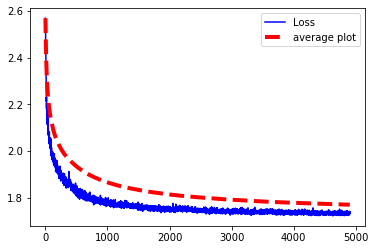

Finished Training


In [25]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


model = autoencoder()


print('Training Started.....')

batch_size=32

dataset = MyDataset()
loader = DataLoader(
    dataset,
    batch_size=batch_size,
    shuffle=True
)


epochs = 45
outputs = [] 
losses=[]
avg_losses=[]
for epoch in range(epochs):
    print('Continuing...')
    print("Epoch:{}".format(epoch))
    running_loss=0.0
    for i, data in enumerate(loader, 0):

        inputs = data

        inputs = inputs.reshape(batch_size,1,128,128)
        x = inputs.to(device).float()        

        model.optimiser.zero_grad()

        outputs,latent_space = model.forward(x)

        x=x.reshape(batch_size,128,128)
       

        
        loss=model.loss(outputs,x.long())
        loss.backward()
        model.optimiser.step()

        running_loss += loss.item()
        losses.append(loss)
        avg_losses.append(sum(losses)/len(losses))
        if i % 2000 == 1999:
            print('f[{epoch + i}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss=0.0
# plt.plot(losses, label = 'Training Loss')
# plt.show()
fig, ax = plt.subplots()
ax.plot(losses, label='Loss', color='blue')
ax.plot(avg_losses,color='red', lw=4, ls='--', label="average plot")
plt.legend(loc=0)
plt.show()
print('Finished Training')

Training Started.....
Continuing...
Epoch:0
Continuing...
Epoch:1
Continuing...
Epoch:2
Continuing...
Epoch:3
Continuing...
Epoch:4
Continuing...
Epoch:5
Continuing...
Epoch:6
Continuing...
Epoch:7
Continuing...
Epoch:8
Continuing...
Epoch:9
Continuing...
Epoch:10
Continuing...
Epoch:11
Continuing...
Epoch:12
Continuing...
Epoch:13
Continuing...
Epoch:14
Continuing...
Epoch:15
Continuing...
Epoch:16
Continuing...
Epoch:17
Continuing...
Epoch:18
Continuing...
Epoch:19
Continuing...
Epoch:20
Continuing...
Epoch:21
Continuing...
Epoch:22
Continuing...
Epoch:23
Continuing...
Epoch:24
Continuing...
Epoch:25
Continuing...
Epoch:26
Continuing...
Epoch:27
Continuing...
Epoch:28
Continuing...
Epoch:29


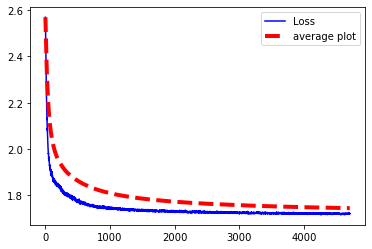

Finished Training


In [24]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


# model = autoencoder()


# print('Training Started.....')

# batch_size=64

# dataset = MyDataset()
# loader = DataLoader(
#     dataset,
#     batch_size=batch_size,
#     shuffle=True
# )


# epochs = 30
# outputs = [] 
# losses=[]
# avg_losses=[]
# for epoch in range(epochs):
#     print('Continuing...')
#     print("Epoch:{}".format(epoch))
#     running_loss=0.0
#     for i, data in enumerate(loader, 0):

#         inputs = data

#         inputs = inputs.reshape(batch_size,1,128,128)
#         x = inputs.to(device).float()        

#         model.optimiser.zero_grad()

#         outputs,latent_space = model.forward(x)

#         x=x.reshape(batch_size,128,128)
       

        
#         loss=model.loss(outputs,x.long())
#         loss.backward()
#         model.optimiser.step()

#         running_loss += loss.item()
#         losses.append(loss)
#         avg_losses.append(sum(losses)/len(losses))
#         if i % 2000 == 1999:
#             print('f[{epoch + i}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
#             running_loss=0.0
# # plt.plot(losses, label = 'Training Loss')
# # plt.show()
# fig, ax = plt.subplots()
# ax.plot(losses, label='Loss', color='blue')
# ax.plot(avg_losses,color='red', lw=4, ls='--', label="average plot")
# plt.legend(loc=0)
# plt.show()
# print('Finished Training')



In [26]:
path = '/home/dh26/Documents/Carla/gym-carla/AutoEncoder_new.pt'
torch.save(model.state_dict(),path)

In [27]:
model.load_state_dict(torch.load(path))

<All keys matched successfully>

In [28]:
# correct = 0 
# total = 0
# with torch.no_grad():
#     for data in testloader:
#         images, labels = data
#         images, labels = images.cuda(), labels.cuda()
#         outputs = net(images)
#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct +=(predicted == labels).sum().item()

# print("Accuracy of the network on the {} test images: {}%".format(len(testloader), 100*correct/total))

dataset = [names for names in list(os.listdir("/home/dh26/Documents/Carla/gym-carla/Unet_images/Sunny/Semantic_array"))]
a = np.load("/home/dh26/Documents/Carla/gym-carla/Unet_images/Sunny/Semantic_array/"+dataset[0])
a = torch.Tensor(a)
a = a.reshape(1,1,128,128).float()
a.to(device)
outputs, latent_space=model(a)

In [29]:
print(outputs.shape)
im = torch.Tensor.argmax(outputs, dim=1)
print(im.shape)
print(im)

torch.Size([1, 13, 128, 128])
torch.Size([1, 128, 128])
tensor([[[1, 9, 9,  ..., 1, 1, 1],
         [1, 9, 9,  ..., 1, 1, 1],
         [9, 9, 9,  ..., 1, 1, 1],
         ...,
         [7, 7, 7,  ..., 7, 7, 7],
         [7, 7, 7,  ..., 7, 7, 7],
         [7, 7, 7,  ..., 7, 7, 7]]], device='cuda:0')


In [30]:
img = im.cpu().detach()
img = img.numpy()

In [31]:
# plt.imshow(a)

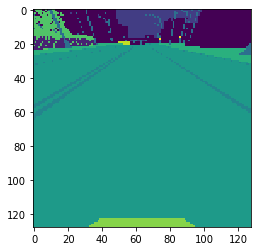

In [32]:
plt.imshow(a.reshape(128,128))

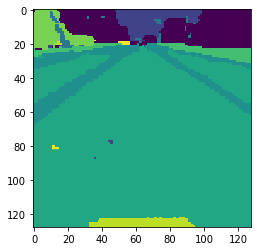

In [33]:
plt.imshow(img.reshape(128,128))

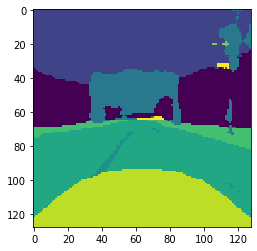

In [30]:
#plt.imshow(img.reshape(128,128))

In [34]:
loss

tensor(1.7320, device='cuda:0', grad_fn=<NllLoss2DBackward0>)

In [31]:
# loss

tensor(1.7186, device='cuda:0', grad_fn=<NllLoss2DBackward0>)

In [32]:
# a = np.load("/home/dh26/Documents/Carla/gym-carla/images/AE_Sem/"+dataset[0])
# a.reshape(1,1,128,128)


array([[[[ 3,  3,  3, ...,  3,  3,  3],
         [ 3,  3,  3, ...,  3,  3,  3],
         [ 3,  3,  3, ...,  3,  3,  3],
         ...,
         [10, 10, 10, ..., 10, 10, 10],
         [10, 10, 10, ..., 10, 10, 10],
         [10, 10, 10, ..., 10, 10, 10]]]], dtype=uint8)

In [130]:
# a = torch.Tensor(a)

In [131]:
# a

tensor([[ 3.,  3.,  3.,  ...,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  ...,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  ...,  3.,  3.,  3.],
        ...,
        [10., 10., 10.,  ..., 10., 10., 10.],
        [10., 10., 10.,  ..., 10., 10., 10.],
        [10., 10., 10.,  ..., 10., 10., 10.]])

In [134]:
a.reshape(1,1,128,128)

tensor([[[[ 3.,  3.,  3.,  ...,  3.,  3.,  3.],
          [ 3.,  3.,  3.,  ...,  3.,  3.,  3.],
          [ 3.,  3.,  3.,  ...,  3.,  3.,  3.],
          ...,
          [10., 10., 10.,  ..., 10., 10., 10.],
          [10., 10., 10.,  ..., 10., 10., 10.],
          [10., 10., 10.,  ..., 10., 10., 10.]]]])